## 블랜저 밴드
- 이동 평균 기준으로 상단과 하단 밴드 활용
- BBand = 중심선 +(-) K * 표준편차
- 매매 시점 : 상단 돌파시 - 과매수 상태(매도시점) , 하단 돌파시 - 과매도 상태(매수시점)

In [1]:
from pykrx import stock
df_stock = stock.get_market_ohlcv_by_date('20000101','20191231','035420') # 네이버
df_stock_close = df_stock[['종가']] # [[]] 데이터프레임으로 하기 위함
df_stock_close.head()

,종가
날짜,
2002-10-29,2312
2002-10-30,2588
2002-10-31,2459
2002-11-01,2305
2002-11-04,2191


### 필요 컬럼
- 이동 평균(14일), 상단과 하단 표준 편차

In [7]:
df_stock_close['20일중심선'] = df_stock_close['종가'].rolling(window=14).mean()
df_stock_close[19:25]

/tmp/ipykernel_9432/3823514902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['20일중심선'] = df_stock_close['종가'].rolling(window=14).mean()


,종가,20일중심선
날짜,,
2002-11-25,2138,2065.000000
2002-11-26,2102,2062.214286
2002-11-27,1979,2050.571429
2002-11-28,2070,2048.285714
2002-11-29,2316,2059.928571
2002-12-02,2379,2084.357143


In [8]:
std_deviation = df_stock_close['종가'].rolling(window=14).std() #표준편자 구하는 법
df_stock_close['상단선'] = df_stock_close['20일중심선'] + 2 * std_deviation
df_stock_close['하단선'] = df_stock_close['20일중심선'] - 2 * std_deviation
df_stock_close[19:25]

/tmp/ipykernel_9432/379926470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['상단선'] = df_stock_close['20일중심선'] + 2 * std_deviation
/tmp/ipykernel_9432/379926470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['하단선'] = df_stock_close['20일중심선'] - 2 * std_deviation


,종가,20일중심선,상단선,하단선
날짜,,,,
2002-11-25,2138,2065.000000,2220.755232,1909.244768
2002-11-26,2102,2062.214286,2213.443462,1910.985110
2002-11-27,1979,2050.571429,2200.432316,1900.710541
2002-11-28,2070,2048.285714,2195.724210,1900.847219
2002-11-29,2316,2059.928571,2259.510387,1860.346756
2002-12-02,2379,2084.357143,2345.940025,1822.774260


### Chart 작성 

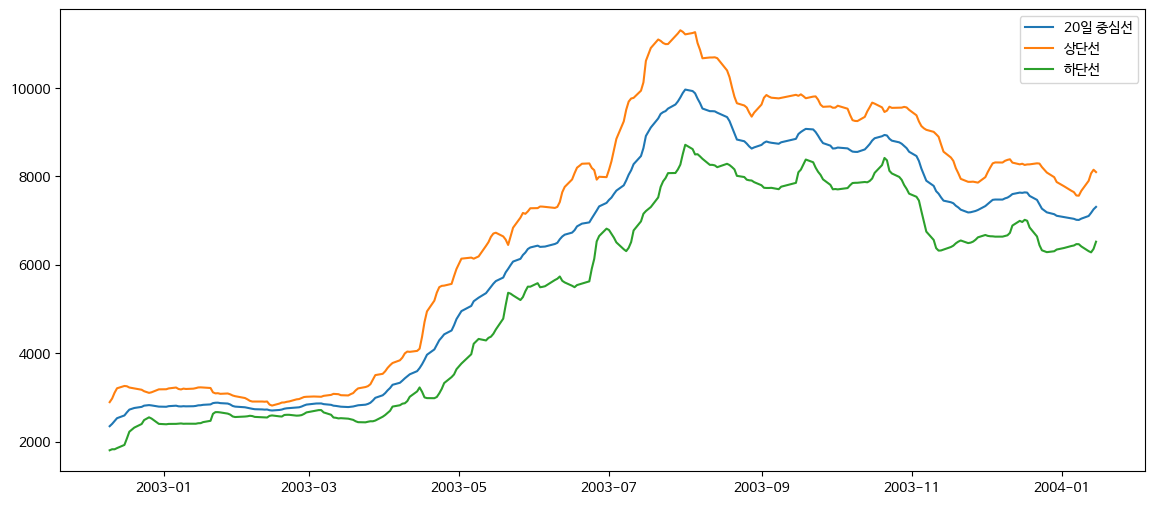

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))

plt.plot(df_stock_close['20일중심선'][30:300], label='20일 중심선')
plt.plot(df_stock_close['상단선'][30:300], label='상단선')
plt.plot(df_stock_close['하단선'][30:300], label='하단선')

plt.legend()
plt.show()